In [ ]:
%pip install wget 

In [ ]:
import wget
import tarfile
import os

if not os.path.exists('data'):
    os.makedirs('data')

url = "http://www.cs.cmu.edu/~ark/personas/data/MovieSummaries.tar.gz"
wget.download(url, "data/movie_summaries.tar.gz")
  
file = tarfile.open('data/movie_summaries.tar.gz')
file.extractall('./data')
file.close()

print(os.listdir("data/MovieSummaries/"))


In [1]:
import pandas as pd

DATA_PATH = 'data/MovieSummaries/'
character_metadata = pd.read_csv(DATA_PATH + 'character.metadata.tsv', 
                                 sep='\t', 
                                 names= [
                                     'Wikipedia movie ID',
                                     'Freebase movie ID',
                                     'Movie release date',
                                     'Character name',
                                     'Actor date of birth',
                                     'Actor gender',
                                     'Actor height (in meters)',
                                     'Actor ethnicity (Freebase ID)',
                                     'Actor name',
                                     'Actor age at movie release',
                                     'Freebase character/actor map ID',
                                     'Freebase character ID',
                                     'Freebase actor ID'
                                 ]
                                 )

movie_metadata = pd.read_csv(DATA_PATH + 'movie.metadata.tsv', sep='\t', header=0,
                             names=['Wikipedia movie ID',
                                         'Freebase movie ID',
                                         'Movie name',
                                         'Movie release date',
                                         'Movie box office revenue',
                                         'Movie runtime',
                                         'Movie languages (Freebase ID:name tuples)',
                                         'Movie countries (Freebase ID:name tuples)',
                                         'Movie genres (Freebase ID:name tuples)'
                                         ])

plot_summaries = pd.read_csv(DATA_PATH + 'plot_summaries.txt', sep='\t', names=[
    'Wikipedia movie ID',
    'Summary'
])

In [2]:
character_metadata.head()

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [3]:
movie_metadata.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples)
0,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
1,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
2,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
3,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
4,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."


In [4]:
plot_summaries.head()

,Wikipedia movie ID,Summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


<BarContainer object of 2 artists>

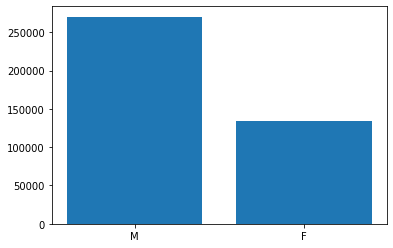

In [5]:
import matplotlib.pyplot as plt
import numpy as np

counts = character_metadata['Actor gender'].value_counts()

plt.bar(counts.index, counts.values)

In [6]:
average_height_male = character_metadata[character_metadata['Actor gender']=='M']['Actor height (in meters)'].mean()
average_height_female = character_metadata[character_metadata['Actor gender']=='F']['Actor height (in meters)'].mean()

In [7]:
average_height_male, average_height_female

(1.8637978485552429, 1.659007531451827)